# E-Commerce Data Science Portfolio

# Sales Forecasting

### Step 1: Get all the Tools Ready.

In [138]:
# Import libraries, etc.
import pandas as pd
import numpy as np

import seaborn as sns # styling 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # for splitting + training

from sklearn.ensemble import RandomForestRegressor #random forest regressor model for this portfolio.

from sklearn.metrics import mean_absolute_error # eval the accuracy

### Step 2: Load the Datasets needed.

In [139]:
# Load the order items. 

# Load orders data - when purchases happened
orders = pd.read_csv("../data/olist_orders_dataset.csv")
print("The size of the orders table: " + str({orders.shape}) + ": (number of rows, columns)")

print("\nShow the first three rows:")
orders.head(3) # show the first three orders


The size of the orders table: {(99441, 8)}: (number of rows, columns)

Show the first three rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [140]:
# Load order items - what was bought and for how much
order_items = pd.read_csv("../data/olist_order_items_dataset.csv")

print("The size of the order_items table: " + str({order_items.shape}) + ": (number of rows, columns)")

print("\nShow the first three rows:")
order_items.head(3) # show the first three orders

The size of the order_items table: {(112650, 7)}: (number of rows, columns)

Show the first three rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [141]:
# Load products - this tells us what type of products were bought
products = pd.read_csv("../data/olist_products_dataset.csv")


print("The size of the products table: " + str({products.shape}) + ": (number of rows, columns)")

print("\nShow the first three rows:")
products.head(3) # show the first three orders

The size of the products table: {(32951, 9)}: (number of rows, columns)

Show the first three rows:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


### Step 3: Merge the Tables to Complete the Sales Data.

In [142]:
# Merge the 3 datasets together.

#The first merge - Connect orders + order items.
sales_data = pd.merge(orders, order_items, on="order_id") # using 'order_id' as a key
print("orders & order_items merged: We have the dates and prices together.")
print("The size of the products table: " + str({sales_data.shape}) + ": (number of rows, columns)")


orders & order_items merged: We have the dates and prices together.
The size of the products table: {(112650, 14)}: (number of rows, columns)


In [143]:
#The second merge - Connect products to the sale_data.
sales_data = pd.merge(sales_data, products, on="product_id") # using 'products_id' as a key
print("sale_data & products merged: We have the dates + prices + categories of products together.")
print("The size of the products table: " + str({sales_data.shape}) + ": (number of rows, columns)")


sale_data & products merged: We have the dates + prices + categories of products together.
The size of the products table: {(112650, 22)}: (number of rows, columns)


### Step 4: The new Combined Dataset

Complete Sales Data: First 10 rows:

                           order_id order_purchase_timestamp   price  product_category_name
0  e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   29.99  utilidades_domesticas
1  53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37  118.70             perfumaria
2  47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49  159.90             automotivo
3  949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   45.00               pet_shop
4  ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   19.90              papelaria
5  a4591c265e18cb1dcee52889e2d8acc3      2017-07-09 21:57:05  147.90             automotivo
6  136cce7faa42fdb2cefd53fdc79a6098      2017-04-11 12:22:08   49.90                    NaN
7  6514b8ad8028c9f2cc2374ded245783f      2017-05-16 13:10:30   59.99             automotivo
8  76c6e866289321a7c93b82b54852dc33      2017-01-23 18:29:09   19.90       moveis_decoracao
9  e69bfb5eb88e0ed6a785585b27e16dbf      20

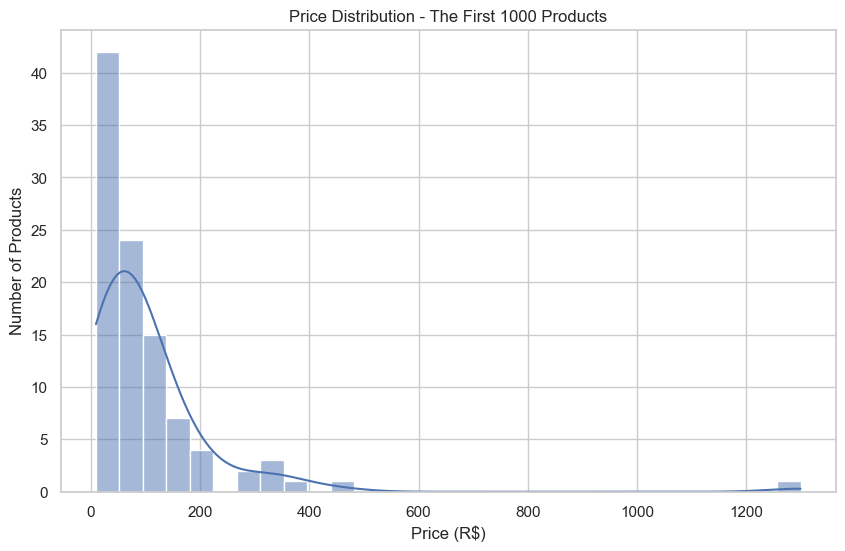

In [144]:
sns.set_theme(style="whitegrid") #seaborn style

print("Complete Sales Data: First 10 rows:\n")

selected_columns = [
    'order_id', 
    'order_purchase_timestamp', 
    'price', 
    'product_category_name'
]

# the data frame
sample_data = sales_data[selected_columns].head(10)
print(sample_data.to_string()) # can use 'index=False ' to remove indexes

print("\n Key columns for Sales Forecasting:")
print("   - order_purchase_timestamp: Date and time of each purchase.")
print("   - price: Sale price of each product in Brazilian Real.")
print("   - product_category_name: Type of product (electronics, furniture, gardening, etc.)")
print("   - freight_value: Shipping cost for each item.")

# The distribution of the product prices:
plt.figure(figsize=(10, 6)) # 10 x 6
sns.histplot(data=sales_data.head(100), x='price', bins=30, kde=True) # top 100 rows by price, range of 30 prices for simplicty, kde = smooth curve
plt.title('Price Distribution - The First 1000 Products')
plt.xlabel('Price (R$)')
plt.ylabel('Number of Products')
plt.show()

## Data Preparation

In [145]:
# Get the data prepared to be used as a forecasting model.

#convert the current order_purchase_timestamp to proper DateTime format.
sales_data['order_purchase_timestamp'] = pd.to_datetime(sales_data['order_purchase_timestamp']) # proper DateTim

# The date range of the data that we have:
start_date = sales_data['order_purchase_timestamp'].min() # earliest data
end_date = sales_data['order_purchase_timestamp'].max() # latast data

print(f"Sales data covers from {start_date.date()} to {end_date.date()}")
print(f"That's about {(end_date - start_date).days} days of sales data")

# Create monthly sales totals from the sales_data - This will be used to predict sale forecasting:
monthly_sales = sales_data.groupby(sales_data['order_purchase_timestamp'].dt.to_period('M'))['price'].sum() # Month/Price

print("\nMonthly sales totals:\n")
print(monthly_sales.head(24)) # Only 24 months of sale data.

print(f"\nWe have {len(monthly_sales)} months of sales data to work with")


Sales data covers from 2016-09-04 to 2018-09-03
That's about 728 days of sales data

Monthly sales totals:

order_purchase_timestamp
2016-09        267.36
2016-10      49507.66
2016-12         10.90
2017-01     120312.87
2017-02     247303.02
2017-03     374344.30
2017-04     359927.23
2017-05     506071.14
2017-06     433038.60
2017-07     498031.48
2017-08     573971.68
2017-09     624401.69
2017-10     664219.43
2017-11    1010271.37
2017-12     743914.17
2018-01     950030.36
2018-02     844178.71
2018-03     983213.44
2018-04     996647.75
2018-05     996517.68
2018-06     865124.31
2018-07     895507.22
2018-08     854686.33
2018-09        145.00
Freq: M, Name: price, dtype: float64

We have 24 months of sales data to work with


### Data Seperation as X & Y + Data Splitting

In [146]:
# We only have 24 months but cleaned its 21.
# Better to use weekly as then we can be more accurate -> less volatility.

print("Weekly sales data for better forecasting:")
weekly_sales = sales_data.groupby(sales_data['order_purchase_timestamp'].dt.to_period('W'))['price'].sum()

print("\nWeekly sales totals:\n")
print(weekly_sales.head(20))  # Show first 20 weeks

print(f"\nWe have {len(weekly_sales)} weeks of sales data to work with (vs {len(monthly_sales)} months)")

# Convert weekly sales to a proper data frame
sales_df = weekly_sales.reset_index()
sales_df.columns = ['week', 'sales']
sales_df['week_num'] = range(len(sales_df))

# Remove incomplete weeks (first and last week might be partial)
sales_df = sales_df[sales_df['sales'] > 1000]  # Adjust threshold for weeks
sales_df = sales_df.reset_index(drop=True)  # Reset index
print(f"After cleaning: {len(sales_df)} weeks of data")

print("Cleaned weekly sales data:")
print(sales_df.head(10))

# Create features using last 4 weeks (instead of 3 months)
X = []  
y = []  

# Use the last 4 weeks to predict the next week
for i in range(4, len(sales_df)):
    X.append([
        sales_df.loc[i-4, 'sales'],  # Sales 4 weeks ago 
        sales_df.loc[i-3, 'sales'],  # Sales 3 weeks ago 
        sales_df.loc[i-2, 'sales'],  # Sales 2 weeks ago 
        sales_df.loc[i-1, 'sales']   # Sales 1 week ago 
    ])
    y.append(sales_df.loc[i, 'sales'])  # Current week's sales

X = np.array(X) # convert to numpy arrrays for ml.
y = np.array(y)

print(f"\nCreated {len(X)} weekly training examples (was {len(monthly_sales)-3} with monthly)")
print(f"Weekly features shape: {X.shape}")
print(f"Weekly target shape: {y.shape}")

# Split into training and testing (same split ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nWeekly training set: {len(X_train)} examples")
print(f"Weekly testing set: {len(X_test)} examples")

Weekly sales data for better forecasting:

Weekly sales totals:

order_purchase_timestamp
2016-08-29/2016-09-04       72.89
2016-09-05/2016-09-11       59.50
2016-09-12/2016-09-18      134.97
2016-09-26/2016-10-02      100.00
2016-10-03/2016-10-09    45715.09
2016-10-10/2016-10-16     3692.57
2016-12-19/2016-12-25       10.90
2017-01-02/2017-01-08     3374.76
2017-01-09/2017-01-15    12937.24
2017-01-16/2017-01-22    24310.46
2017-01-23/2017-01-29    57773.15
2017-01-30/2017-02-05    71710.34
2017-02-06/2017-02-12    78487.83
2017-02-13/2017-02-19    54493.94
2017-02-20/2017-02-26    47463.29
2017-02-27/2017-03-05    72974.86
2017-03-06/2017-03-12    78362.16
2017-03-13/2017-03-19    95524.38
2017-03-20/2017-03-26    84932.00
2017-03-27/2017-04-02    86443.03
Freq: W-SUN, Name: price, dtype: float64

We have 95 weeks of sales data to work with (vs 24 months)
After cleaning: 89 weeks of data
Cleaned weekly sales data:
                    week     sales  week_num
0  2016-10-03/2016-10-09

### Create, Train, Test the Data Model using Random Forest Regressor

Random Forest Model for Weekly Forecast:



Testing the model on unseen weekly data:
Actual sales vs Predicted sales:

  Week 1: Actual R$222,527.28 | Predicted R$202,278.76
  Week 2: Actual R$24,310.46 | Predicted R$61,884.67
  Week 3: Actual R$295,792.81 | Predicted R$239,382.28
  Week 4: Actual R$87,998.43 | Predicted R$115,613.31
  Week 5: Actual R$59,888.01 | Predicted R$100,025.37
  Week 6: Actual R$245,609.63 | Predicted R$220,582.23
  Week 7: Actual R$86,443.03 | Predicted R$91,699.42
  Week 8: Actual R$116,000.65 | Predicted R$115,506.45
  Week 9: Actual R$54,493.94 | Predicted R$87,426.43
  Week 10: Actual R$237,109.22 | Predicted R$229,777.63

Weekly Model accuracy: Average prediction error = R$37,436.13

Weekly Forecasting Performance Chart:


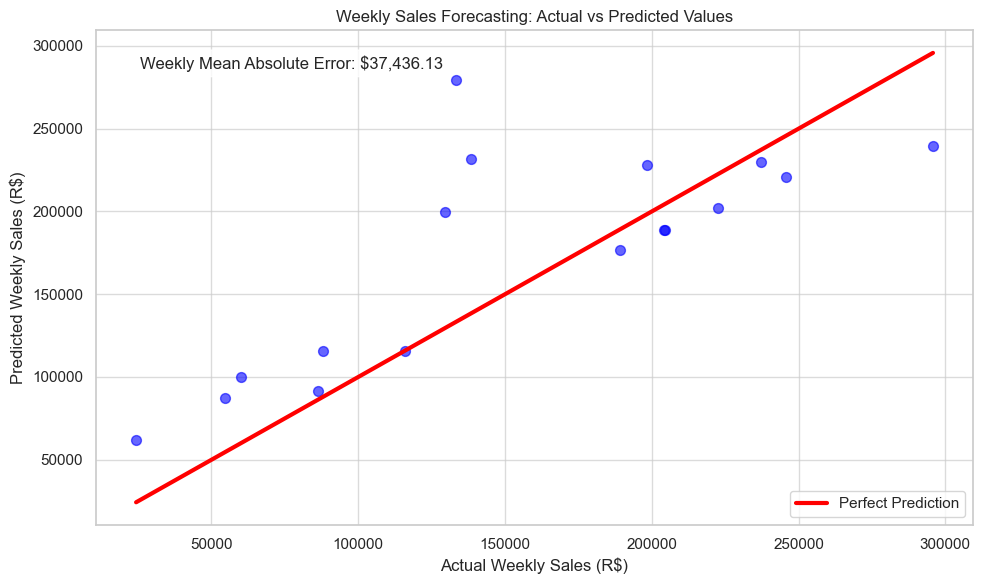

In [147]:
# Create and train the Random Forest model for weekly

print("Random Forest Model for Weekly Forecast:\n")

# Create the model - 100 trees + state -> 42
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train it on our training data
model.fit(X_train, y_train)



# Test the model
predictions = model.predict(X_test)

print("\n\nTesting the model on unseen weekly data:")
print("Actual sales vs Predicted sales:\n")
for i in range(min(10, len(X_test))):  # Show first 10 examples
    print(f"  Week {i+1}: Actual R${y_test[i]:,.2f} | Predicted R${predictions[i]:,.2f}")

# determine the accuracy
accuracy = mean_absolute_error(y_test, predictions)
print(f"\nWeekly Model accuracy: Average prediction error = R${accuracy:,.2f}")

# ML Performance Chart
print("\nWeekly Forecasting Performance Chart:")

plt.figure(figsize=(10, 6))

# Actual vs Predicted values scatter plot
plt.scatter(y_test, predictions, alpha=0.6, color='blue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', lw=3, label='Perfect Prediction')
plt.xlabel('Actual Weekly Sales (R$)')
plt.ylabel('Predicted Weekly Sales (R$)')
plt.title('Weekly Sales Forecasting: Actual vs Predicted Values')
plt.legend() # desc ofr line
plt.grid(alpha=0.7) # transparency of grid.

# Add accuracy text box
plt.text(0.05, 0.95, f'Weekly Mean Absolute Error: ${accuracy:,.2f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         verticalalignment='top')

plt.tight_layout()
plt.show()

### Performance -> Weekly Forecasting

In [148]:
# initially we did monthly but it was extremely innacurate + volatile as we only had
# 21 months to work off. 
# Doing weekly still showed to be somewhat inacurate due to the volatility of the data.
# So rolling averages along with seasonal features were added to reduce the noise.
# This proved to have been more successful that sticking with the monthly data.

print("Weekly Forecasting with Rolling Averages:\n")

# Create weekly sales with better features
weekly_sales = sales_data.groupby(sales_data['order_purchase_timestamp'].dt.to_period('W'))['price'].sum()
sales_df = weekly_sales.reset_index() # reset
sales_df.columns = ['week', 'sales']

# Add rolling averages to smooth out the volatility caused by the sales data
sales_df['rolling_avg_4w'] = sales_df['sales'].rolling(4).mean()  # 4-week average
sales_df['rolling_avg_8w'] = sales_df['sales'].rolling(8).mean()  # 8-week average  
sales_df['prev_week'] = sales_df['sales'].shift(1)  # Previous week

# Remove rows with missing values from rolling averages
sales_df = sales_df.dropna().reset_index(drop=True)  # Reset index after dropna
sales_df['week_num'] = range(len(sales_df))  # Add week numbers back

print(f"After adding rolling features: {len(sales_df)} weeks of data") # show length

# Create features using multiple time perspectives
X = []  # feature matrix
y = []  # target vector

for i in range(8, len(sales_df)):  # Start from week 8 to have all the features
    X.append([
        sales_df.loc[i-1, 'sales'],           # Last week
        sales_df.loc[i-1, 'rolling_avg_4w'],  # 4-week average
        sales_df.loc[i-1, 'rolling_avg_8w'],  # 8-week average
        sales_df.loc[i-4, 'sales'],           # Same week last month (FIXED: now i-4 exists)
        (i % 4) + 1,                          # Week of month (1,2,3,4)
        (i % 52) + 1,                          # Week of year (seasonality)
    ])
    y.append(sales_df.loc[i, 'sales'])

# for ml must convert to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"\nCreated {len(X)} training examples with features") # num of x
print(f"Features: [last_week, 4wk_avg, 8wk_avg, last_month, week_of_month, week_of_year]")

# Split and train 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {len(X_train)} examples")
print(f"Testing set: {len(X_test)} examples")

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(X_train, y_train) # train on the historical sales data.
predictions = model.predict(X_test) # make predictions on unseen test data.

# Calculate improved accuracy
accuracy = mean_absolute_error(y_test, predictions) # cal kpi
average_actual = np.mean(y_test) # mean weekly sales
average_percentage_error = (accuracy / average_actual) * 100 # % error % of sales

print(f"\nWeekly Performance:\n")

print(f"Average Absolute Error: ${accuracy:,.2f}")
print(f"Average Percentage Error: {average_percentage_error:.1f}%")
print(f"Average Weekly Sales: ${average_actual:,.2f}")

# Show top 10 results only
print(f"\nTop 10 Weekly Predictions:\n")

for i in range(min(10, len(X_test))):
    actual = y_test[i]
    predicted = predictions[i]
    error_pct = (abs(actual - predicted) / actual) * 100
    print(f"Week {i+1}: Actual ${actual:,.0f} | Predicted ${predicted:,.0f} | Error: {error_pct:.1f}%\n")


Weekly Forecasting with Rolling Averages:

After adding rolling features: 88 weeks of data

Created 80 training examples with features
Features: [last_week, 4wk_avg, 8wk_avg, last_month, week_of_month, week_of_year]

Training set: 64 examples
Testing set: 16 examples

Weekly Performance:

Average Absolute Error: $14,808.71
Average Percentage Error: 9.9%
Average Weekly Sales: $149,135.45

Top 10 Weekly Predictions:

Week 1: Actual $145,966 | Predicted $141,031 | Error: 3.4%

Week 2: Actual $72,975 | Predicted $84,153 | Error: 15.3%

Week 3: Actual $120,780 | Predicted $116,641 | Error: 3.4%

Week 4: Actual $143,598 | Predicted $147,921 | Error: 3.0%

Week 5: Actual $107,176 | Predicted $87,178 | Error: 18.7%

Week 6: Actual $160,164 | Predicted $148,029 | Error: 7.6%

Week 7: Actual $113,052 | Predicted $93,227 | Error: 17.5%

Week 8: Actual $156,420 | Predicted $206,977 | Error: 32.3%

Week 9: Actual $86,443 | Predicted $90,779 | Error: 5.0%

Week 10: Actual $116,001 | Predicted $116,6


New weekly Forecasting Performance Chart - more accurate than previous chart:


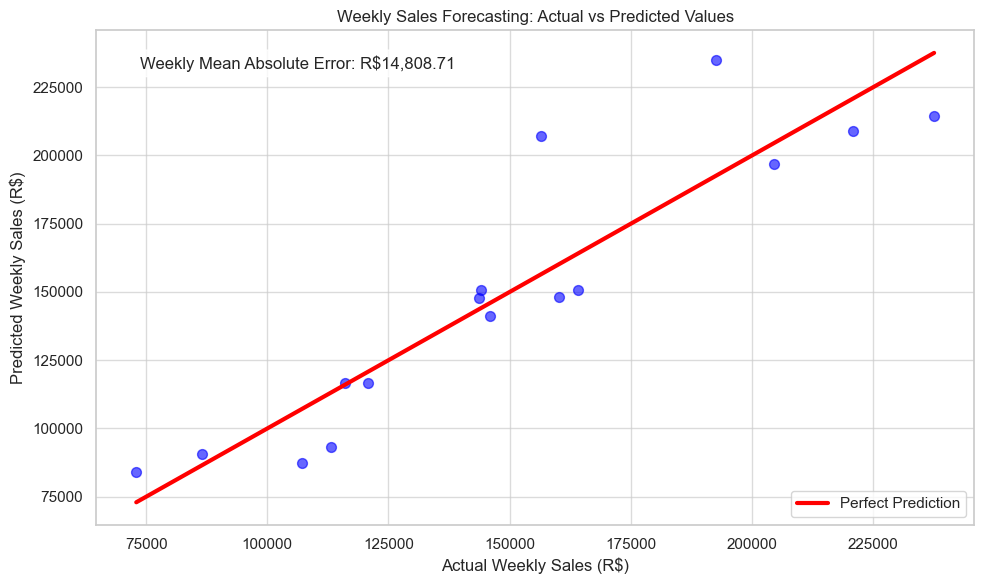

In [149]:
# ML Performance Chart (new)
print("\nNew weekly Forecasting Performance Chart - more accurate than previous chart:")

plt.figure(figsize=(10, 6))

# Actual vs Predicted values scatter plot
plt.scatter(y_test, predictions, alpha=0.6, color='blue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', lw=3, label='Perfect Prediction')
plt.xlabel('Actual Weekly Sales (R$)')
plt.ylabel('Predicted Weekly Sales (R$)')
plt.title('Weekly Sales Forecasting: Actual vs Predicted Values')
plt.legend() # desc ofr line
plt.grid(alpha=0.7) # transparency of grid.

# Add accuracy text box
plt.text(0.05, 0.95, f'Weekly Mean Absolute Error: R${accuracy:,.2f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         verticalalignment='top')

plt.tight_layout()
plt.show()

## Conclusion